In [80]:
import albumentations as A
import os
import time
import uuid
import cv2
import matplotlib.pyplot as plt

In [81]:
augmentor = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.RandomBrightnessContrast(p=0.2),
    A.RandomGamma(p=0.2), 
    A.RGBShift(p=0.2), 
    A.VerticalFlip(p=0.5)
])

In [82]:
# Input directories for images and masks
image_folder = '../src/data/train_images'
mask_folder = '../src/data/train_masks'

# Output directories for transformed images and masks
output_image_folder = '../src/data/augment_image'
output_mask_folder = '../src/data/augment_mask'

# Create output directories if they don't exist
os.makedirs(output_image_folder, exist_ok=True)
os.makedirs(output_mask_folder, exist_ok=True)

# Get the list of filenames in the image folder
image_files = os.listdir(image_folder)

In [83]:
for image_file in image_files:
    # Read the image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    
    # Read the corresponding mask
    mask_file = image_file.replace('.PNG', '_mask.PNG')
    mask_path = os.path.join(mask_folder, mask_file)
    mask = cv2.imread(mask_path)
    
    # Perform augmentation
    transformed = augmentor(image=image, mask=mask)
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    
    # Save the transformed image
    transformed_image_path = os.path.join(output_image_folder, f'transformed_{image_file}')
    cv2.imwrite(transformed_image_path, cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))
    
    # Save the transformed mask
    transformed_mask_path = os.path.join(output_mask_folder, f'transformed_{mask_file}')
    cv2.imwrite(transformed_mask_path, cv2.cvtColor(transformed_mask, cv2.COLOR_RGB2BGR))

# Augmentation Exploration - Sample Image

In [70]:
image = cv2.imread(os.path.join('..','src','data','train_images','1.PNG'))

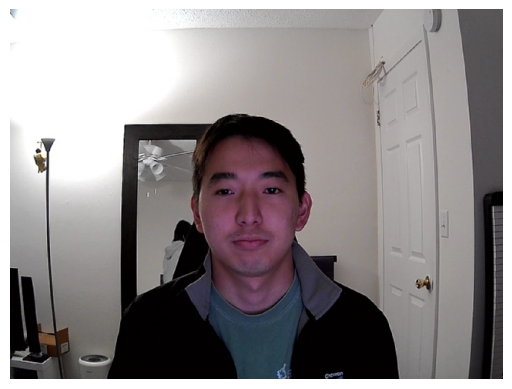

In [71]:
# Convert the color channels from BGR to RGB (OpenCV reads images in BGR format)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axes
plt.show()

In [72]:
mask = cv2.imread(os.path.join('..','src','data','train_masks','1_mask.PNG'))

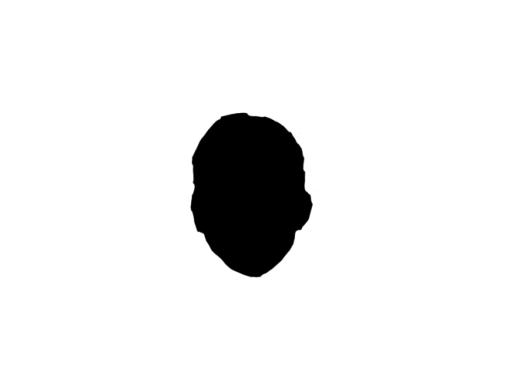

In [73]:
# Convert the color channels from BGR to RGB (OpenCV reads images in BGR format)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(mask_rgb)
plt.axis('off')  # Hide the axes
plt.show()

In [74]:
transformed = augmentor(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']

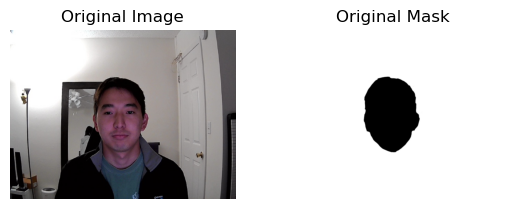

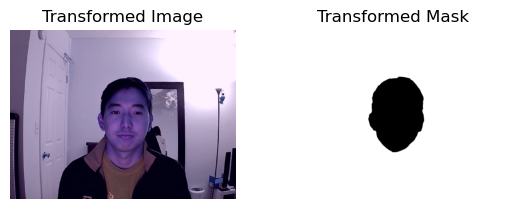

In [75]:
# Display the original image and mask
plt.subplot(1, 2, 1)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask_rgb)
plt.title('Original Mask')
plt.axis('off')

plt.show()


# Display the transformed image and mask
plt.subplot(1, 2, 1)
plt.imshow(transformed_image)
plt.title('Transformed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_mask)
plt.title('Transformed Mask')
plt.axis('off')

plt.show()

In [76]:
# Save the transformed image and mask
output_dir = os.path.join('..','src','data','augment_image')
os.makedirs(output_dir, exist_ok=True)

transformed_image_path = os.path.join(output_dir, 'transformed_image.png')

output_dir = os.path.join('..','src','data','augment_mask')
transformed_mask_path = os.path.join(output_dir, 'transformed_mask.png')

cv2.imwrite(transformed_image_path, cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))
cv2.imwrite(transformed_mask_path, cv2.cvtColor(transformed_mask, cv2.COLOR_RGB2BGR))

True